In [68]:
from importlib.metadata import version
import nltk
import tensorflow
import summa
import pandas as pd

print(nltk.__version__)
print(tensorflow.__version__)
print(pd.__version__)
print(version('summa'))

3.6.5
2.6.0
1.3.3
1.2.0


# Step 1. 데이터 수집하기

In [69]:
import urllib.request

urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [70]:
# 이 데이터는 기사의 본문에 해당되는 text와 headlines 두 가지 열로 구성되어져 있습니다.
# 추상적 요약을 하는 경우에는 text를 본문, headlines를 이미 요약된 데이터로 삼아서 모델을 학습할 수 있어요. 
# 추출적 요약을 하는 경우에는 오직 text열만을 사용하세요.

data.sample(10)

,headlines,text
7080,"EVM machine found lying on road in Rajasthan, ...",An EVM machine was found lying unattended on t...
23975,"Walmart plans to create 30,000 jobs in UP with...",Walmart India has said it expects to set up 15...
23081,Man once ran naked on Lord's pitch to win ÃÂ£...,"Michael Angelow, a merchant seaman, ran naked ..."
49529,'Secret Superstar' earns over Ã¢ÂÂ¹500 cr in ...,Aamir Khan and Zaira Wasim starrer 'Secret Sup...
17123,CBSE topper's gangrape pre-planned with a doct...,"The police have arrested Nishu Phogat, the mai..."
53275,Their time is up: Oprah on sexual predators in...,Television show host-philanthropist Oprah Winf...
54934,"Jadhav's wife forced to remove mangalsutra, bi...",Accusing Pakistan of harassing Kulbhushan Jadh...
51365,United's new 17.5-hour flight is third longest...,United Airlines has launched a 17.5-hour Houst...
22120,Anderson's 5-for helps England dismiss India f...,Fast bowler James Anderson took his Test caree...
51040,Modi 1st Indian PM to address World Economic F...,Prime Minister Narendra Modi on Tuesday addres...


# Step 2. 데이터 전처리하기 (추상적 요약)

### 정규화, 불용어 제거

In [71]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


In [72]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
from bs4 import BeautifulSoup 
import re

# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

display(data["text"][:5].apply(preprocess_sentence))
display(data["headlines"][:5].apply(lambda x: preprocess_sentence(x, remove_stopwords=False)))

0    saurav kant alumnus upgrad iiit pg program mac...
1    kunal shah credit card bill payment platform c...
2    new zealand defeated india wickets fourth odi ...
3    aegon life iterm insurance plan customers enjo...
4    speaking sexual harassment allegations rajkuma...
Name: text, dtype: object

0    upgrad learner switches to career in ml al wit...
1    delhi techie wins free food from swiggy for on...
2    new zealand end rohit sharma led india match w...
3    aegon life iterm insurance plan helps customer...
4    have known hirani for yrs what if metoo claims...
Name: headlines, dtype: object

In [74]:
data["text"] = data["text"].apply(preprocess_sentence)
data["headlines"] = data["headlines"].apply(lambda x: preprocess_sentence(x, remove_stopwords=False))

In [75]:
data

,headlines,text
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...
...,...,...
98396,crpf jawan axed to death by maoists in chhatti...,crpf jawan tuesday axed death sharp edged weap...
98397,first song from sonakshi sinha noor titled uff...,uff yeh first song sonakshi sinha starrer upco...
98398,the matrix film to get reboot reports,according reports new version science fiction ...
98399,snoop dogg aims gun at clown dressed as trump ...,new music video shows rapper snoop dogg aiming...


### 결측치 제거

In [76]:
data.isna().sum()

headlines    0
text         0
dtype: int64

### 데이터 확인

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09983638377659
헤드라인의 최소 길이 : 1
헤드라인의 최대 길이 : 16
헤드라인의 평균 길이 : 9.299651426306644


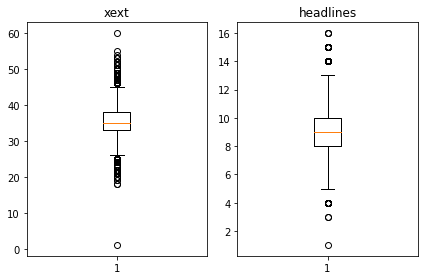

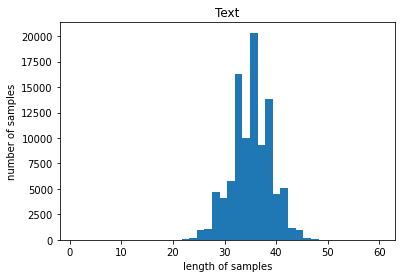

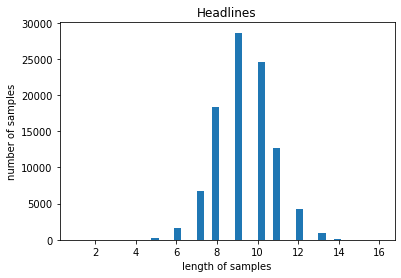

In [77]:
# 길이 분포 출력
import matplotlib.pyplot as plt
import numpy as np

text_len = [len(s.split()) for s in data['text']]
headlines_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('헤드라인의 최소 길이 : {}'.format(np.min(headlines_len)))
print('헤드라인의 최대 길이 : {}'.format(np.max(headlines_len)))
print('헤드라인의 평균 길이 : {}'.format(np.mean(headlines_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('xext')
plt.subplot(1,2,2)
plt.boxplot(headlines_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Headlines')
plt.hist(headlines_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [78]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(50, data['text'])
below_threshold_len(12,  data['headlines'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9998577250231196
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9880387394437048


### Encoder, Decoder 데이터셋

In [79]:
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
1,delhi techie wins free food from swiggy for on...,kunal shah credit card bill payment platform c...,sostoken delhi techie wins free food from swig...,delhi techie wins free food from swiggy for on...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
4,have known hirani for yrs what if metoo claims...,speaking sexual harassment allegations rajkuma...,sostoken have known hirani for yrs what if met...,have known hirani for yrs what if metoo claims...
...,...,...,...,...
98396,crpf jawan axed to death by maoists in chhatti...,crpf jawan tuesday axed death sharp edged weap...,sostoken crpf jawan axed to death by maoists i...,crpf jawan axed to death by maoists in chhatti...
98397,first song from sonakshi sinha noor titled uff...,uff yeh first song sonakshi sinha starrer upco...,sostoken first song from sonakshi sinha noor t...,first song from sonakshi sinha noor titled uff...
98398,the matrix film to get reboot reports,according reports new version science fiction ...,sostoken the matrix film to get reboot reports,the matrix film to get reboot reports eostoken
98399,snoop dogg aims gun at clown dressed as trump ...,new music video shows rapper snoop dogg aiming...,sostoken snoop dogg aims gun at clown dressed ...,snoop dogg aims gun at clown dressed as trump ...


In [80]:
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

### 데이터셋 split

In [81]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

테스트 데이터의 수 : 19680
훈련 데이터의 개수 : 78721
훈련 레이블의 개수 : 78721
테스트 데이터의 개수 : 19680
테스트 레이블의 개수 : 19680


### Tokenizing

In [82]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

threshold = 10
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 68201
등장 빈도가 9번 이하인 희귀 단어의 수: 49987
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 18214
단어 집합에서 희귀 단어의 비율: 73.29364672072258
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.480704874384717


In [83]:
src_vocab = 18000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성

In [84]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

print(encoder_input_train[:3])

[[6517, 6862, 8212, 9931, 8777, 1663, 1737, 1994, 1398, 626, 11734, 1746, 2320, 1296, 879, 22, 140, 1224, 1663, 8212, 2562, 604, 349, 943, 5075, 133, 3393, 2292, 1819, 1547, 2176, 8212, 211, 324, 1994, 2192, 62, 8495], [5456, 237, 1275, 1048, 542, 1433, 413, 599, 101, 2370, 222, 373, 345, 5548, 17, 2, 13689, 8496, 26, 3704, 2967, 2642, 4732, 101, 117, 17, 3531, 125, 2643, 542, 533, 99, 4488, 10395, 3683, 38, 14651, 11735, 2502], [25, 712, 819, 3, 686, 597, 265, 4683, 72, 222, 7, 86, 89, 86, 265, 144, 3, 262, 118, 86, 795, 235, 5405, 1288, 6518, 1306, 163, 409, 86, 1669, 3, 481, 2468, 2681, 323, 265, 115, 474]]


In [85]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

threshold = 10
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29736
등장 빈도가 9번 이하인 희귀 단어의 수: 22109
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 7627
단어 집합에서 희귀 단어의 비율: 74.35095507129405
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.978040693699411


In [86]:
tar_vocab = 7000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 4976, 3, 726, 4, 1905, 8, 1148, 1149], [1, 26, 3678, 160, 244, 365, 14, 3033, 5, 123, 40, 7], [1, 41, 1237, 339, 453, 553, 487, 9, 157, 635, 3034], [1, 181, 1759, 500, 952, 1734, 850, 370], [1, 47, 2106, 2742, 5, 101, 148, 76, 960, 184, 78, 10, 2639, 611]]
target
decoder  [[4976, 3, 726, 4, 1905, 8, 1148, 1149, 2], [26, 3678, 160, 244, 365, 14, 3033, 5, 123, 40, 7, 2], [41, 1237, 339, 453, 553, 487, 9, 157, 635, 3034, 2], [181, 1759, 500, 952, 1734, 850, 370, 2], [47, 2106, 2742, 5, 101, 148, 76, 960, 184, 78, 10, 2639, 611, 2]]


In [87]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

encoder_input_train = [sentence for index, sentence in enumerate(encoder_input_train) if index not in drop_train]
decoder_input_train = [sentence for index, sentence in enumerate(decoder_input_train) if index not in drop_train]
decoder_target_train = [sentence for index, sentence in enumerate(decoder_target_train) if index not in drop_train]

encoder_input_test = [sentence for index, sentence in enumerate(encoder_input_test) if index not in drop_test]
decoder_input_test = [sentence for index, sentence in enumerate(decoder_input_test) if index not in drop_test]
decoder_target_test = [sentence for index, sentence in enumerate(decoder_target_test) if index not in drop_test]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

삭제할 훈련 데이터의 개수 : 1
삭제할 테스트 데이터의 개수 : 0
훈련 데이터의 개수 : 78720
훈련 레이블의 개수 : 78720
테스트 데이터의 개수 : 19680
테스트 레이블의 개수 : 19680


In [88]:
# padding
text_max_len = 60
headlines_max_len = 20

encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')

decoder_input_train = pad_sequences(decoder_input_train, maxlen=headlines_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=headlines_max_len, padding='post')

decoder_input_test = pad_sequences(decoder_input_test, maxlen=headlines_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=headlines_max_len, padding='post')

# Step 3. 어텐션 메커니즘 사용하기 (추상적 요약)

### 모델 설계

In [89]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Encoder
embedding_dim = 128
hidden_size = 256

encoder_inputs = Input(shape=(text_max_len,))
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(enc_emb)
encoder_lstm3 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4)
encoder_outputs, state_h, state_c = encoder_lstm3(encoder_output2)


In [90]:
# Decoder
decoder_inputs = Input(shape=(None,))

dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

In [91]:
from tensorflow.keras.layers import AdditiveAttention

# Encoder-Decoder Attention
attn_layer = AdditiveAttention(name='attention_layer')
attn_out = attn_layer([decoder_outputs, encoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 60, 128)      2304000     input_12[0][0]                   
__________________________________________________________________________________________________
input_13 (InputLayer)           [(None, None)]       0                                            
__________________________________________________________________________________________________
lstm_5 (LSTM)                   [(None, 60, 256), (N 394240      embedding_2[0][0]                
____________________________________________________________________________________________

### 모델 훈련

In [92]:
from tensorflow.keras.callbacks import ModelCheckpoint

model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy')

callbacks = [
    ModelCheckpoint(f"model.keras",
                    monitor="val_loss",
                    save_best_only=True)
]

history = model.fit(x=[encoder_input_train, decoder_input_train], 
                    y=decoder_target_train,
                    validation_data=([encoder_input_test, decoder_input_test], decoder_target_test),
                    batch_size=256, 
                    epochs=30,
                    callbacks=callbacks)

Epoch 1/30
308/308 [==============================] - 40s 119ms/step - loss: 3.2754 - val_loss: 2.8688
Epoch 2/30
308/308 [==============================] - 36s 119ms/step - loss: 2.8594 - val_loss: 2.6682
Epoch 3/30
308/308 [==============================] - 36s 117ms/step - loss: 2.6637 - val_loss: 2.5246
Epoch 4/30
308/308 [==============================] - 36s 117ms/step - loss: 2.5072 - val_loss: 2.4404
Epoch 5/30
308/308 [==============================] - 36s 117ms/step - loss: 2.3872 - val_loss: 2.3550
Epoch 6/30
308/308 [==============================] - 36s 118ms/step - loss: 2.2868 - val_loss: 2.2955
Epoch 7/30
308/308 [==============================] - 36s 117ms/step - loss: 2.2015 - val_loss: 2.2503
Epoch 8/30
308/308 [==============================] - 36s 118ms/step - loss: 2.1258 - val_loss: 2.2155
Epoch 9/30
308/308 [==============================] - 36s 118ms/step - loss: 2.0589 - val_loss: 2.1860
Epoch 10/30
308/308 [==============================] - 36s 117ms/step - l

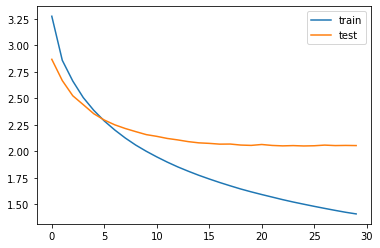

In [93]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Step 4. 실제 결과와 요약문 비교하기 (추상적 요약)

In [94]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [95]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf = attn_layer([decoder_outputs2, decoder_hidden_state_input])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [96]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (headlines_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [97]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i != 0):
            temp = temp + src_index_to_word[i] + ' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    return " ".join(src_index_to_word.get(seq, "") for seq in input_seq)

In [98]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : village gujarat district holds annual event auction sewage water also makes revenue village low groundwater sewage water used irrigation purposes farming notably village first got idea auction three years back received revenue 
실제 요약 : said seven pnb hbo vietnam commission end             
예측 요약 :  mp starts kg of water to promote


원문 : lizard found veg biryani served passenger howrah delhi express train tuesday passenger ate biryani later discovered dead lizard tweeted complaint railway minister suresh prabhu incident comes amid cag report said food trains unfit human consumption 
실제 요약 : said empowerment group added leaves acquire india remain first worth          
예측 요약 :  insect found in bag in mumbai


원문 : adobe tuesday announced stop updating distributing flash player plug end flash technology one widely used ways watch videos play games online recent years google chrome microsoft edge safari flash favour alternative 
실제 요약 : said november shows india declared google tsuna

# Step 5. Summa을 이용해서 추출적 요약해보기

In [99]:
from summa.summarizer import summarize

for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", summarize(seq2text(encoder_input_test[i]), ratio=0.2))
    print("\n")

원문 : village gujarat district holds annual event auction sewage water also makes revenue village low groundwater sewage water used irrigation purposes farming notably village first got idea auction three years back received revenue 
실제 요약 : said seven pnb hbo vietnam commission end             
예측 요약 : 


원문 : lizard found veg biryani served passenger howrah delhi express train tuesday passenger ate biryani later discovered dead lizard tweeted complaint railway minister suresh prabhu incident comes amid cag report said food trains unfit human consumption 
실제 요약 : said empowerment group added leaves acquire india remain first worth          
예측 요약 : 


원문 : adobe tuesday announced stop updating distributing flash player plug end flash technology one widely used ways watch videos play games online recent years google chrome microsoft edge safari flash favour alternative 
실제 요약 : said november shows india declared google tsunami prime            
예측 요약 : 


원문 : newly appointed president 

---

## 비교

In [106]:
from summa.summarizer import summarize

text = []
summary = []
abstractive_summary = []
extractive_summary = []


for i in range(200, 210):
    text.append(seq2text(encoder_input_test[i]))
    summary.append(seq2summary(decoder_input_test[i]))
    abstractive_summary.append(decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    extractive_summary.append(summarize(seq2text(encoder_input_test[i]), ratio=0.4))
    
for t, s, a, e in zip(text, summary, abstractive_summary, extractive_summary):
    print("원문:", t)
    print("요약 원문:", s)
    print("추상적 요약:", a)
    print("추출적 요양:", e)
    print("========")

원문: farmer roman built replica russia fifa world cup semi final venue st petersburg stadium mock billion spent construction arena made comes seating st petersburg arena completed december year delay 
요약 원문: said standing article tribunal india stephen another pradesh canadian           
추상적 요약:  world cup winner booked for world cup
추출적 요양: 
원문: rajasthan government requested airports authority india build separate terminal form jaipur international airport vip movement aai official said vvips need separate entry exit ensure security currently state aircraft carrying vips operated state 
요약 원문: said games reportedly programme hospitals painting potentially two cryptocurrencies show          
추상적 요약:  govt to buy stake in anti sikh airports
추출적 요양: 
원문: milan banned food trucks selfie sticks certain areas italian city reported effort curb selfie related deaths anti social behaviour like damage artworks also banned tourists locals using glass bottles rules enforced till august following 

In [104]:
comparison = pd.DataFrame({
    "text": text,
    "summary": summary,
    "abstractive_summary": abstractive_summary,
    "extractive_summary": extractive_summary,
})

comparison

,text,summary,abstractive_summary,extractive_summary
0,farmer roman built replica russia fifa world c...,said standing article tribunal india stephen a...,world cup winner booked for world cup,
1,rajasthan government requested airports author...,said games reportedly programme hospitals pain...,govt to buy stake in anti sikh airports,
2,milan banned food trucks selfie sticks certain...,said strip head states birds missile trump bha...,indonesia bans people from using,
3,uk national health service announced plans sto...,said captain india formal india give indo also...,uk to offer to save online,
4,sweden preparing hold first biggest military e...,said retailer india products arrested funding ...,sweden to build military nuclear war,
5,bolivia president declared total independence ...,said save armed suffering minister last ceo pl...,imf chief to be world largest imf chief,
6,maldivian opposition alleged blocked entering ...,said kind polling minister rural viral ...,opposition president to vote in venezuela,
7,swiss town sealed monday attacker stormed offi...,said delay samsung francisco data old waymo am...,metre mayor of metre metre attempt,
8,online fashion store trolled bag supposed say ...,said going plea producer us pakistan garden mi...,twitter reacts to look at,
9,ram nath kovind sworn india th president tuesd...,said american interestingly apologised researc...,president kovind celebrates th independence day,


---

- 추상적 요약의 경우 실제과 요약 비교했을 때 많은 차이를 보였다.
  - 요약 예측 결과를 보았을 때 요약의 성능이 좋은 것 같진 않다.
  - 애초에 본문 자체가 매우 짧고 요약 또한 매우 짧기 때문에 난이도가 높은 task라고 생각된다.
  
- 추출적 요약의 경우 문장이 짧아서 그런지 ratio를 아무리 바꿔도 빈 문자열만 리턴되었다.

- 모델 자체가 복잡해서 전처리 및 모델 설계에 시간을 많이 써서 여러 방면으로 실험을 하진 못했다.
  - 동일한 모델에서 데이터를 어떻게 전처리하면 좋을지에 대해서 알아보면 좋을 것 같다.